In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# bike sharing demand는 Continuous 한 결과값 예측이기 때문에 Regressor가 더 적합 (cf.Classifier)
from sklearn.ensemble import RandomForestRegressor

In [2]:
# train data 가져오기
train = pd.read_csv("data/train.csv")
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# test data 가져오기
test = pd.read_csv("data/test.csv")
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
# test 데이터에는 registered / casual 컬럼이 없음. -> feature로 사용할 수 없음

## Data Preprocessing

In [5]:
# datatime 형변환 / 쪼개기
train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime_year"] = train["datetime"].dt.year
train["datetime_month"] = train["datetime"].dt.month
train["datetime_day"] = train["datetime"].dt.day
train["datetime_hour"] = train["datetime"].dt.hour
train["datetime_minute"] = train["datetime"].dt.minute
train["datetime_second"] = train["datetime"].dt.second

print(train.shape)
train.head()

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [6]:
# test data 동일작업
# datatime 형변환 / 쪼개기
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime_year"] = test["datetime"].dt.year
test["datetime_month"] = test["datetime"].dt.month
test["datetime_day"] = test["datetime"].dt.day
test["datetime_hour"] = test["datetime"].dt.hour
test["datetime_minute"] = test["datetime"].dt.minute
test["datetime_second"] = test["datetime"].dt.second

print(test.shape)
test.head()

(6493, 15)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


In [7]:
# matplotlib 시각화 노트북에 띄우기
%matplotlib inline

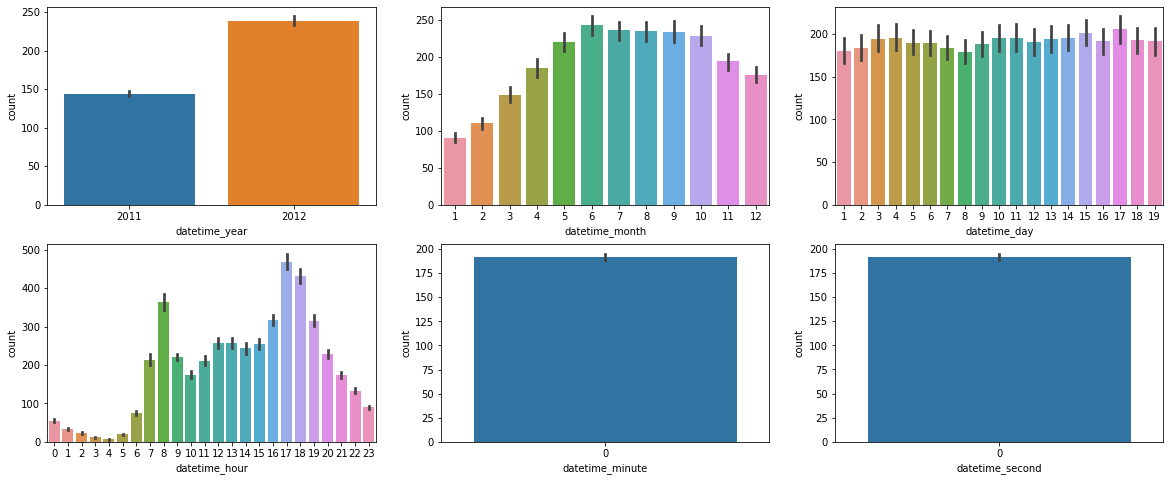

In [8]:
# 시계열별 count 분석
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,8)
sns.barplot(data=train, x="datetime_year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime_month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime_day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime_hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime_minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime_second", y="count", ax=ax6)

### 분석
- datetime_month
    계절별 차이가 있음. 12월과 1월은 비슷한 기후 조건인데 차이가 좀 남.
- datetime_day 
    20 ~ 데이터가 존재하지 않음. (test데이터는 20일 이후의 데이터만 존재 = 날짜가 판단의 기준이 되면 정확도가 떨어진다)
- datetime_hour
    7~8 / 17~19 유독 많음. 아마 출퇴근 시간대라 그런 것 같음. workinday/holiday 일 때 시간별 분석이 의미가 있을 것 같음.
- datetime_minute, datetiem_second
    전부 0 으로 의미 없는 columns


In [9]:
train = train.drop(columns=["datetime_minute", "datetime_second"])
print(train.shape)
train.head()

(10886, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [10]:
test = test.drop(columns=["datetime_minute", "datetime_second"])
print(test.shape)

(6493, 13)


### 가설 
1. 2011보다 2012의 데이터가 많음. 두 데이터의 시간데이터 분포를 확인해야 한다. 한 쪽이 일부 데이터만 있을 경우 결과에 크게 영향을 미칠 수 있음
1. 요일별 분석도 의미가 있을 듯.
1. 시간대별 workingday / holiday 비교
1. workingday = 1 인 날의 일집계는 전부 비슷할 것. 출근은 계속 해야함..
1. season의 경우 봄/가을이 더 높을 것으로 예상됨. 특히 holiday 일 경우.
1. weather 컬럼이 클수록 count 낮아질 것으로 예쌍. 기후가 나쁘면 자전거보다 다른 교통수단 선호.
1. temp/atemp/windspeed 는 서로 밀접한 관계. 함께 묶어서 분석하면 좋을 듯.
1. 습도는 여름의 경우 크게 작용할 수 있을 것 같아보임.
1. registerd/casual 을 사용할 수 있는 방안이 있을까?

가설 9에 대하여 요일별 등록회원 비율을 반영할 수 있지 않을까. 의미가 있을까

#### 가설 1

In [11]:
# 2011 / 2012 데이터 분포 분석
print(train.loc[ train["datetime_year"] == 2011, "datetime_year" ].value_counts())
print(train.loc[ train["datetime_year"] == 2012, "datetime_year" ].value_counts())

2011    5422
Name: datetime_year, dtype: int64
2012    5464
Name: datetime_year, dtype: int64


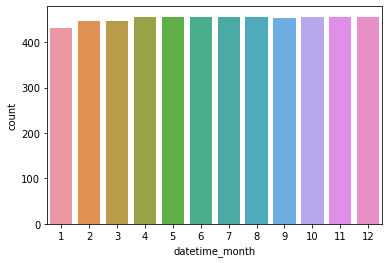

In [12]:
sns.countplot(data=train[train["datetime_year"] == 2011], x="datetime_month", )

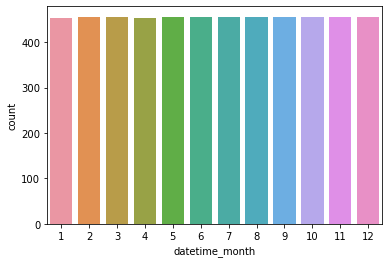

In [13]:
sns.countplot(data=train[train["datetime_year"] == 2012], x="datetime_month")

In [14]:
pd.pivot_table(train, index=["datetime_year","datetime_month"], values="datetime", aggfunc="count")

datetime
datetime_year datetime_month          
2011          1                    431
              2                    446
              3                    446
              4                    455
              5                    456
              6                    456
              7                    456
              8                    456
              9                    453
              10                   455
              11                   456
              12                   456
2012          1                    453
              2                    455
              3                    455
              4                    454
              5                    456
              6                    456
              7                    456
              8                    456
              9                    456
              10                   456
              11                   455
              12                   456

In [15]:
train_2011 = train[train["datetime_year"] == 2011]
print(train_2011.loc[train_2011["datetime_month"]==1, "datetime_day"].min())
print(train_2011.loc[train_2011["datetime_month"]==1, "datetime_day"].max())

1
19


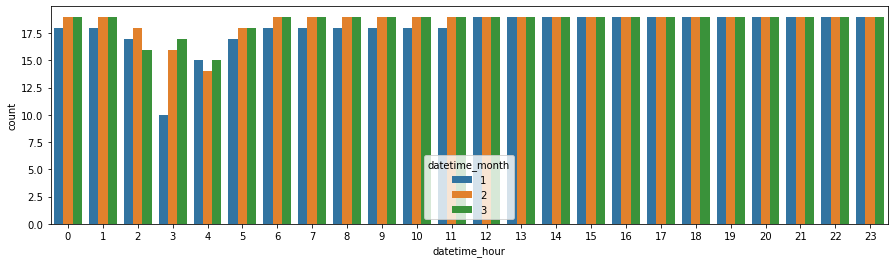

In [16]:
plt.figure(figsize = (15,4))
sns.countplot(data=train_2011[train_2011["datetime_month"].isin([1,2,3])], x="datetime_hour", hue="datetime_month")

2011년 1~3월 데이터 개수가 적음. 특히 1,2월 시간대가 많이 빠짐. 2011-2월 이후의 데이터부터 보거나 빈 시간대를 평균으로 채워주는 것이 나을 듯.

In [17]:
#train_test 로 퉐별 count 체크
train_test = train[(train["datetime_year"] == 2012)|((train["datetime_year"] == 2011) & (train["datetime_month"] > 2))]
print(train_test.shape)
train_test[train_test["datetime_year"] == 2011].head()

(10009, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour
877,2011-03-01 00:00:00,1,0,1,1,12.30,13.635,70,31.0009,0,7,7,2011,3,1,0
878,2011-03-01 01:00:00,1,0,1,1,10.66,11.365,70,23.9994,0,3,3,2011,3,1,1
879,2011-03-01 02:00:00,1,0,1,1,9.84,10.605,65,26.0027,0,4,4,2011,3,1,2
880,2011-03-01 03:00:00,1,0,1,1,9.02,10.605,69,19.0012,0,2,2,2011,3,1,3
881,2011-03-01 04:00:00,1,0,1,1,9.02,10.605,69,16.9979,0,1,1,2011,3,1,4


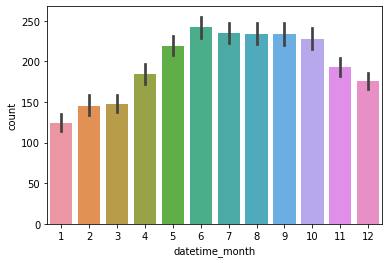

In [18]:
sns.barplot(data=train_test, x="datetime_month", y="count")

In [19]:
train = train[(train["datetime_year"] == 2012)|((train["datetime_year"] == 2011) & (train["datetime_month"] > 2))]
print(train.shape)

(10009, 16)


In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour
877,2011-03-01 00:00:00,1,0,1,1,12.30,13.635,70,31.0009,0,7,7,2011,3,1,0
878,2011-03-01 01:00:00,1,0,1,1,10.66,11.365,70,23.9994,0,3,3,2011,3,1,1
879,2011-03-01 02:00:00,1,0,1,1,9.84,10.605,65,26.0027,0,4,4,2011,3,1,2
880,2011-03-01 03:00:00,1,0,1,1,9.02,10.605,69,19.0012,0,2,2,2011,3,1,3
881,2011-03-01 04:00:00,1,0,1,1,9.02,10.605,69,16.9979,0,1,1,2011,3,1,4


In [21]:
# 2011년 3월 데이터 빈 시간대 추이
train_201103 = train[(train["datetime_year"] == 2011) & (train["datetime_month"] == 3)]
pd.pivot_table(data=train_201103, index="datetime_hour", values="count", aggfunc=["mean", "count"])

,mean,count
,count,count
datetime_hour,,
0,19.789474,19
1,12.631579,19
2,8.562500,16
3,5.000000,17
4,2.400000,15
5,5.888889,18
6,27.631579,19
7,82.578947,19


In [22]:
pd.pivot_table(data=train_201103, index="datetime_day", values="datetime_hour", aggfunc="count")

,datetime_hour
datetime_day,
1,24
2,24
3,24
4,24
5,24
6,23
7,23
8,24
9,24


In [23]:
train_201103[train_201103["datetime_day"]==10].iloc[0:25]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,2011,3,10,0
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,2011,3,10,1
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1,2011,3,10,2
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,2011,3,10,5
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12,2011,3,10,6
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37,2011,3,10,7
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44,2011,3,10,8
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24,2011,3,10,9
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17,2011,3,10,10
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11,2011,3,10,11


In [24]:
# 2011-03 데이터 (일단) 삭제
#train = train[(train["datetime_year"] == 2012)|((train["datetime_year"] == 2011) & (train["datetime_month"] > 3))]
print(train.shape)

(10009, 16)


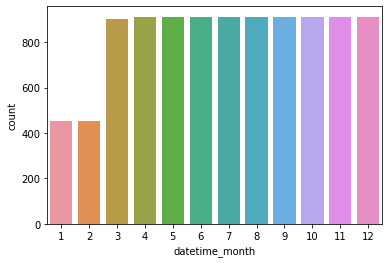

In [25]:
sns.countplot(data=train, x="datetime_month")

#### 가설2 요일별 검증

In [26]:
# dayofweek 추가
train["datetime_dayofweek"] = train["datetime"].dt.dayofweek
print(train.shape)
train.head()

(10009, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek
877,2011-03-01 00:00:00,1,0,1,1,12.30,13.635,70,31.0009,0,7,7,2011,3,1,0,1
878,2011-03-01 01:00:00,1,0,1,1,10.66,11.365,70,23.9994,0,3,3,2011,3,1,1,1
879,2011-03-01 02:00:00,1,0,1,1,9.84,10.605,65,26.0027,0,4,4,2011,3,1,2,1
880,2011-03-01 03:00:00,1,0,1,1,9.02,10.605,69,19.0012,0,2,2,2011,3,1,3,1
881,2011-03-01 04:00:00,1,0,1,1,9.02,10.605,69,16.9979,0,1,1,2011,3,1,4,1


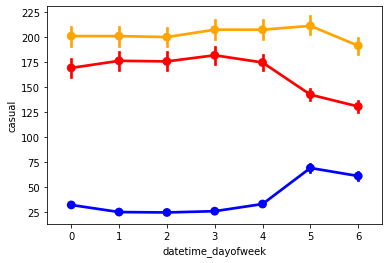

In [27]:
# 요일별 count, registered, casual 비교
sns.pointplot(data=train, x="datetime_dayofweek", y="count", color="orange")
sns.pointplot(data=train, x="datetime_dayofweek", y="registered", color="red")
sns.pointplot(data=train, x="datetime_dayofweek", y="casual", color="blue")

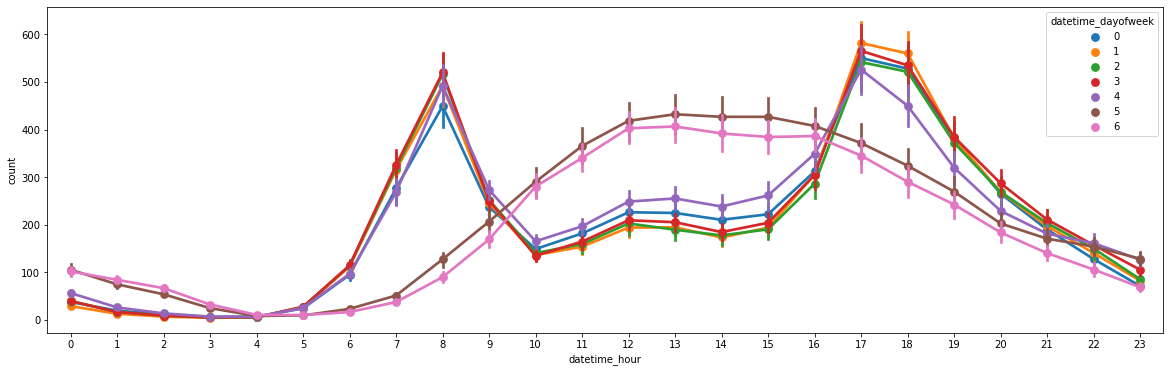

In [28]:
#요일-시간대 비교
plt.figure(figsize=(20,6))
dayofweek_label = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sns.pointplot(data=train, x="datetime_hour", y="count", hue="datetime_dayofweek" )

주로 평일에는 출퇴근 시간대, 주말에는 오후타임에 많이 빌림.
요일별 분포가 뚜렷하게 나타나기 때문에 dayofweek, hour를 학습시키면 성능 향상 예상.

In [29]:
# test data에 요일 추가하기
test["datetime_dayofweek"] = test["datetime"].dt.dayofweek
print(test.shape)
test.head()

(6493, 14)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


#### 가설3 workingday/holiday 시간대별 비교

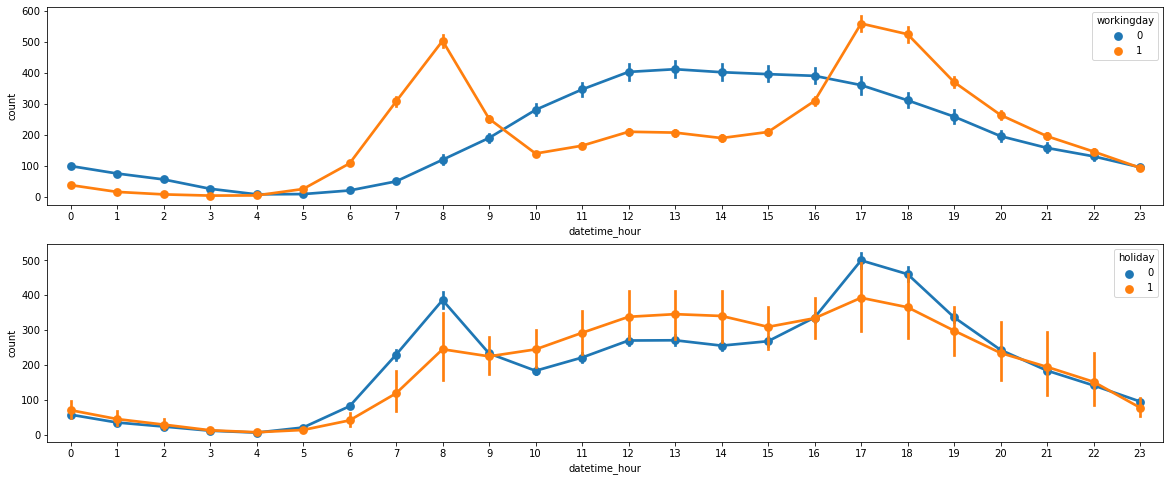

In [30]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(20, 8)
sns.pointplot(data=train, x="datetime_hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime_hour", y="count", hue="holiday", ax=ax2)

* holiday=1 일 때의 그래프는 출퇴근 시간대에도 count가 높다.
* holiday 여부에 관계없이 출퇴근 하거나, holiday에만 출퇴근 하는 사람들도 있을 수 있다.
* workingday의 경우 여부에 따라 시간대별 count가 나뉜다. holiday=0 / workingday=1의 추세도 비슷하게 보인다.
* 다만, workinday보다는 dayofweek으로 판단하는 것이 더 정확한 값을 추론할 수 있을 것 같다.
* holiday는 추가 분석이 필요.

In [31]:
train_holiday = train[train["holiday"] == 1]
print(train_holiday.shape)
train_holiday.head()

(287, 17)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek
1658,2011-04-15 00:00:00,2,1,0,1,18.04,21.970,67,0.0000,6,21,27,2011,4,15,0,4
1659,2011-04-15 01:00:00,2,1,0,1,18.04,21.970,62,0.0000,6,9,15,2011,4,15,1,4
1660,2011-04-15 02:00:00,2,1,0,1,16.40,20.455,76,0.0000,8,10,18,2011,4,15,2,4
1661,2011-04-15 03:00:00,2,1,0,1,16.40,20.455,76,0.0000,0,3,3,2011,4,15,3,4
1662,2011-04-15 04:00:00,2,1,0,1,15.58,19.695,82,6.0032,0,3,3,2011,4,15,4,4


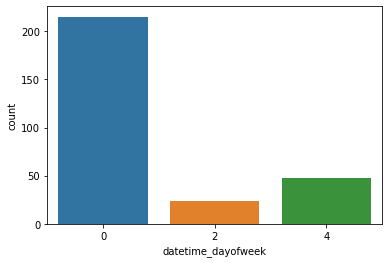

In [32]:
# hodliay의 요일 분포
sns.countplot(data=train_holiday, x="datetime_dayofweek")

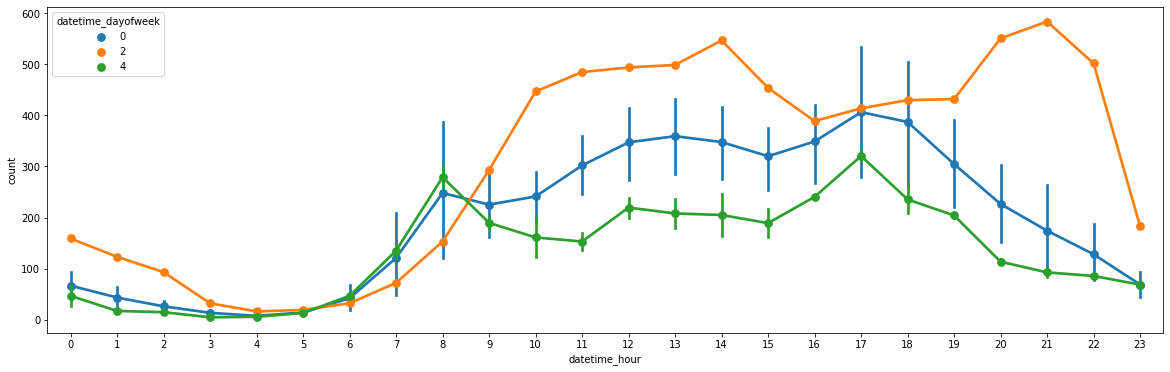

In [33]:
# 요일에 따른 시간대별 추이
plt.figure(figsize=(20,6))
sns.pointplot(data=train_holiday, x="datetime_hour", y="count", hue="datetime_dayofweek")

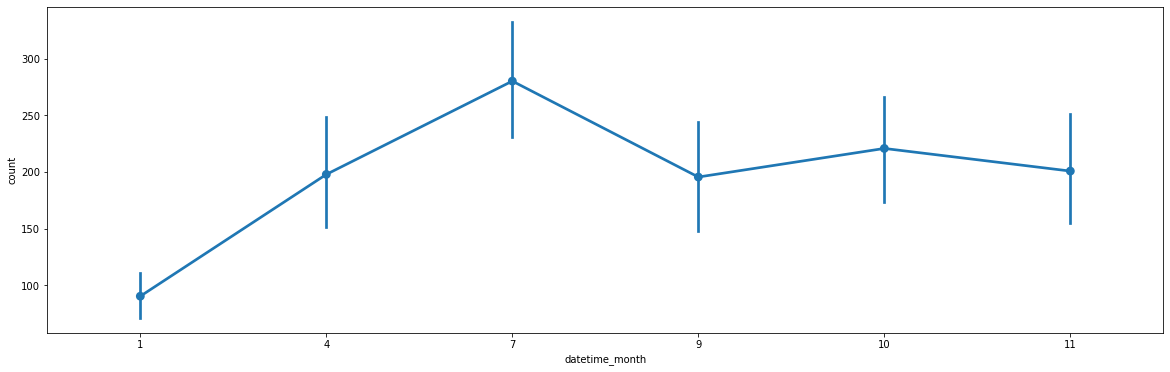

In [34]:
# 월별 추이
plt.figure(figsize=(20,6))
sns.pointplot(data=train_holiday, x="datetime_month", y="count")

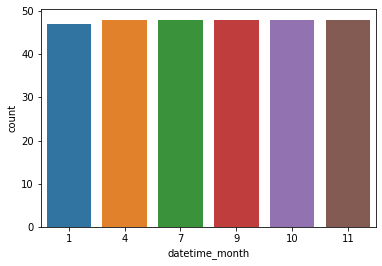

In [35]:
# hodliay의 월 분포
sns.countplot(data=train_holiday, x="datetime_month")

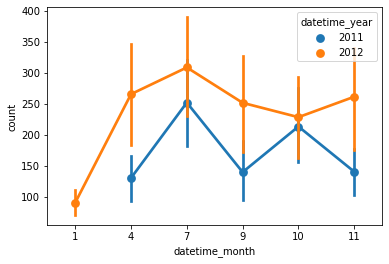

In [36]:
sns.pointplot(data=train_holiday, x="datetime_month", y="count", hue="datetime_year")

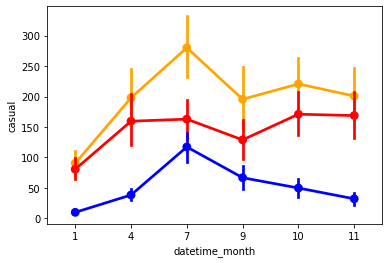

In [37]:
# 요일별 count, registered, casual 비교
sns.pointplot(data=train_holiday, x="datetime_month", y="count", color="orange")
sns.pointplot(data=train_holiday, x="datetime_month", y="registered", color="red")
sns.pointplot(data=train_holiday, x="datetime_month", y="casual", color="blue")

In [38]:
train_holiday.duplicated(subset=["datetime_year","datetime_month","datetime_day"], keep="first")

1658     False
1659      True
1660      True
1661      True
1662      True
         ...  
10257     True
10258     True
10259     True
10260     True
10261     True
Length: 287, dtype: bool

In [39]:
# 년,월,일 기준 unique 값 찾기
train_holiday.loc[train_holiday.duplicated(subset=["datetime_year","datetime_month","datetime_day"], keep="first") == False
                                         ,["datetime_year","datetime_month","datetime_day", "datetime_dayofweek"]]


,datetime_year,datetime_month,datetime_day,datetime_dayofweek
1658,2011,4,15,4
2762,2011,7,4,0
3698,2011,9,5,0
4271,2011,10,10,0
4750,2011,11,11,4
5446,2012,1,2,0
5780,2012,1,16,0
7143,2012,4,16,0
8223,2012,7,4,2
9111,2012,9,3,0


holiday에서 유의미한 데이터를 못찾겠다.
12월 데이터가 없는 것으로 봐서 크리스마스는 holiday로 들어가지 않은 것 같다. 
내가 생각하는 holiday의 의미와 다른 것 같다.
-> 일단 holiday 는 feature에서 제외

#### 가설4 workingday = 1 인 날의 일집계 
workingday를 feature로 사용하기로 했기 때문에 feature 여부 판단은 아니지만 가설 확인.

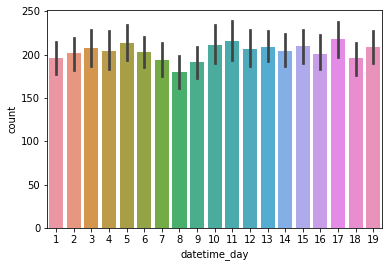

In [40]:
sns.barplot(data=train[train["workingday"]==1], x="datetime_day", y="count")

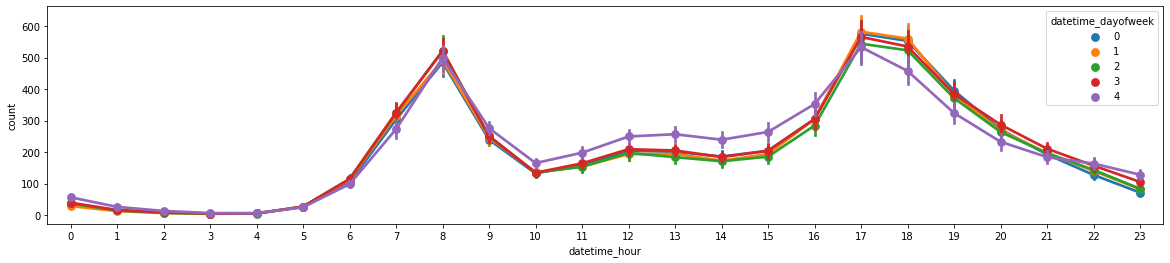

In [41]:
plt.figure(figsize = (20,4))
sns.pointplot(data=train[train["workingday"]==1], x="datetime_hour", y="count", hue="datetime_dayofweek")

#### 가설5 season의 경우 봄/가을이 더 높을 것으로 예상됨

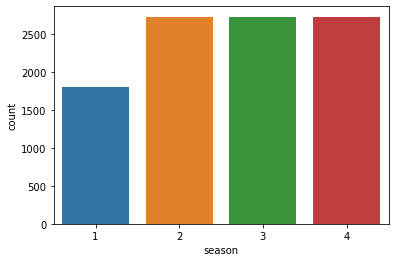

In [42]:
sns.countplot(data=train, x="season")

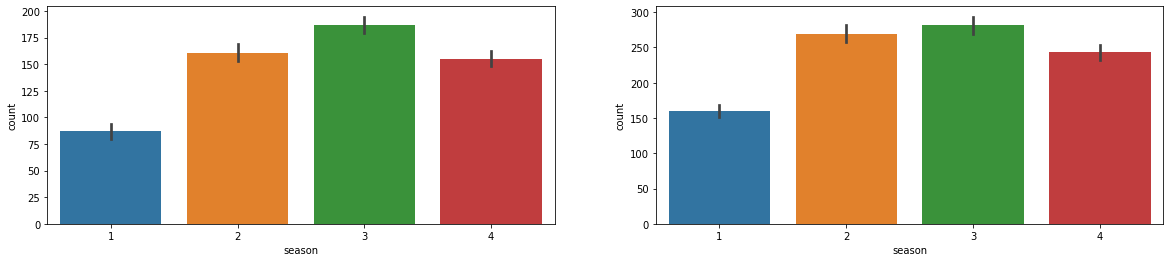

In [43]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20,4)
sns.barplot(data=train[train["datetime_year"]==2011], x="season", y="count", ax=ax1)
sns.barplot(data=train[train["datetime_year"]==2012], x="season", y="count", ax=ax2)

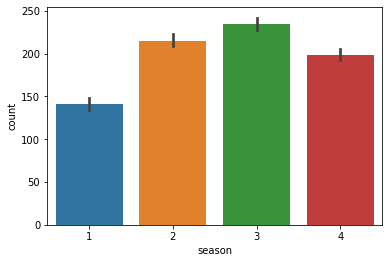

In [44]:
sns.barplot(data=train, x="season", y="count")

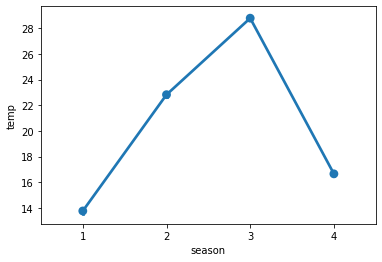

In [45]:
# 시즌별 평균 기온 비교
sns.pointplot(data=train, x="season", y="temp")

season에 따라 차이가 나지만 조금 온도나 다른 조건과 결합했을 때 영향을 주는지 체크가 필요.

season의 평균기온과 시즌별 count가 비슷한 모양을 보이는 것으로 보아 온도의 영향이 더 클 것으로 보인다.

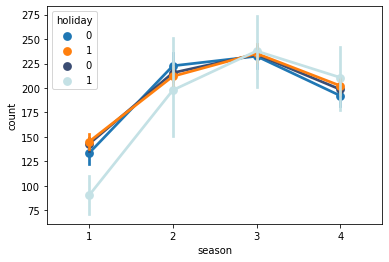

In [46]:
# holiday/workingday
sns.pointplot(data=train, x="season", y="count", hue="workingday")
sns.pointplot(data=train, x="season", y="count", hue="holiday", palette="ch:r=-.2,d=.3_r")

holiday=1 일때 유독 1,2 시즌의 count가 적다. why?

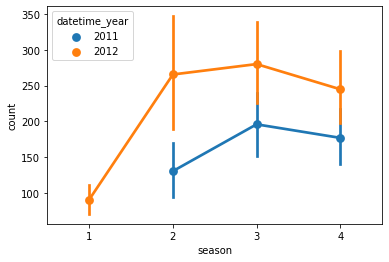

In [47]:
sns.pointplot(data=train[train["holiday"] == 1], x="season", y="count", hue="datetime_year")

In [48]:
### heatmap


가설6 weather에 따른 상관관계

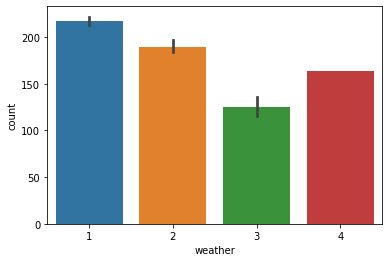

In [49]:
sns.barplot(data=train, x="weather", y="count")

In [50]:
# 4일 때 더 높다. & 신뢰구간이 없다 -> 확인
train[train["weather"]==4].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0


weather가 4일 때의 데이터 모수가 적어서 신뢰구간이 없다.
분석 시 weather가 4일 경우 필요 이상으로 높게 예측될 수 있다.

In [51]:
test[test["weather"]==4].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,2
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,5


테스트 데이터도 weather가 4일 경우가 2건 밖에 없기 때문에 weather값을 3으로 변경하거나 해당 데이터 삭제가 예측 정확도를 더 높일 수 있을 것 같다.

In [52]:
# weather를 3으로 변경. 다른 조건을 기반으로 예측하기
# 추가 컬럼 만들기

train.loc[train["weather"]==4, "weather"] = 3
train[train["weather"]==4].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek


In [53]:
train.loc[5631,"weather"]

3

In [54]:
# weather를 3으로 변경하지 않고 새 컬럼 추가하기. 
train.loc[5631,"weather"] = 4
train[train["weather"]==4].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0


In [55]:
train["weather_mod"] = train["weather"]
train.loc[train["weather_mod"]==4,"weather_mod"] = 3
train[train["weather"]==4].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek,weather_mod
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,3


In [56]:
# test weather를 3으로 변경한 컬럼 추가. 다른 조건을 기반으로 예측하기
test["weather_mod"] = test["weather"]
test.loc[test["weather_mod"]==4,"weather_mod"] = 3
test[test["weather"]==4].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek,weather_mod
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,2,3
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,5,3


가설 7 temp/atemp/windspeed

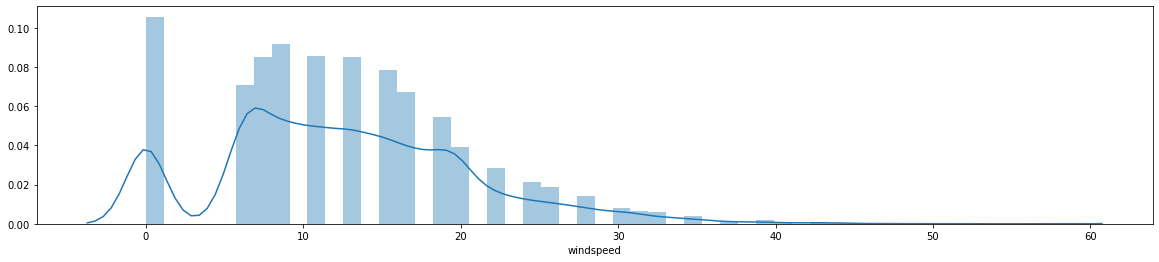

In [57]:
# windspeed 분포보기
plt.figure(figsize=(20,4))
sns.distplot(train["windspeed"])

연속적이지 않은 구간데이터. 0이 비정상적으로 많음

In [58]:
# windspeed 반올림
train["windspeed_int"] = train["windspeed"].round(0)
train[["windspeed","windspeed_int"] ].head()

,windspeed,windspeed_int
877,31.0009,31.0
878,23.9994,24.0
879,26.0027,26.0
880,19.0012,19.0
881,16.9979,17.0


In [59]:
# windspeed 0인 구간 채우기 -> 위/아래의 평균값
train["windspeed_prev"] = train["windspeed_int"].shift(1)
train["windspeed_next"] = train["windspeed_int"].shift(-1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek,weather_mod,windspeed_int,windspeed_prev,windspeed_next
877,2011-03-01 00:00:00,1,0,1,1,12.30,13.635,70,31.0009,0,...,7,2011,3,1,0,1,1,31.0,NaN,24.0
878,2011-03-01 01:00:00,1,0,1,1,10.66,11.365,70,23.9994,0,...,3,2011,3,1,1,1,1,24.0,31.0,26.0
879,2011-03-01 02:00:00,1,0,1,1,9.84,10.605,65,26.0027,0,...,4,2011,3,1,2,1,1,26.0,24.0,19.0
880,2011-03-01 03:00:00,1,0,1,1,9.02,10.605,69,19.0012,0,...,2,2011,3,1,3,1,1,19.0,26.0,17.0
881,2011-03-01 04:00:00,1,0,1,1,9.02,10.605,69,16.9979,0,...,1,2011,3,1,4,1,1,17.0,19.0,19.0


In [60]:
# windspeed == 0인 row값 위/아래 평균으로 채우기
train.loc[train["windspeed"] == 0, "windspeed_int"] = ((train["windspeed_prev"] + train["windspeed_next"]) / 2).round()
train.loc[train["windspeed"] == 0, ["windspeed","windspeed_int", "windspeed_prev", "windspeed_next"]]

,windspeed,windspeed_int,windspeed_prev,windspeed_next
890,0.0,9.0,9.0,9.0
892,0.0,8.0,9.0,6.0
898,0.0,6.0,6.0,7.0
914,0.0,16.0,13.0,20.0
940,0.0,4.0,7.0,0.0
...,...,...,...,...
10826,0.0,8.0,6.0,9.0
10829,0.0,12.0,6.0,17.0
10846,0.0,8.0,9.0,6.0
10860,0.0,10.0,15.0,6.0


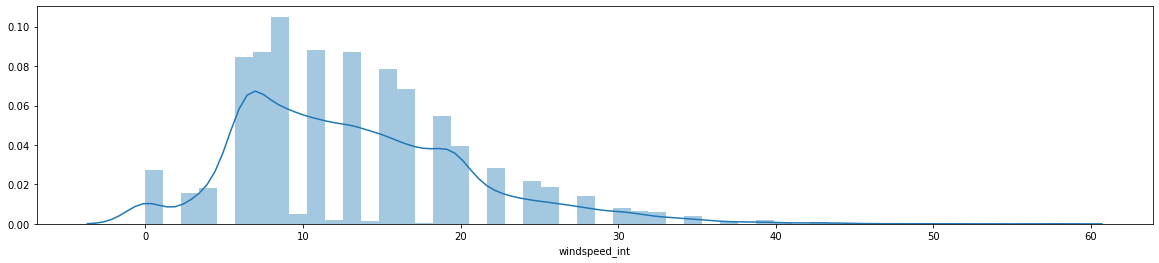

In [61]:
plt.figure(figsize=(20,4))
sns.distplot(train["windspeed_int"])

In [62]:
# test 데이터 처리
test["windspeed_int"] = test["windspeed"].round(0)
# windspeed 0인 구간 채우기 -> 위/아래의 평균값
test["windspeed_prev"] = test["windspeed_int"].shift(1)
test["windspeed_next"] = test["windspeed_int"].shift(-1)
# windspeed == 0인 row값 위/아래 평균으로 채우기
test.loc[test["windspeed"] == 0, "windspeed_int"] = ((test["windspeed_prev"] + test["windspeed_next"]) / 2).round()
test.loc[test["windspeed"] == 0, ["windspeed","windspeed_int", "windspeed_prev", "windspeed_next"]]

,windspeed,windspeed_int,windspeed_prev,windspeed_next
1,0.0,13.0,26.0,0.0
2,0.0,6.0,0.0,11.0
12,0.0,9.0,11.0,7.0
60,0.0,7.0,7.0,7.0
62,0.0,10.0,7.0,13.0
...,...,...,...,...
6433,0.0,3.0,6.0,0.0
6434,0.0,3.0,0.0,6.0
6436,0.0,6.0,6.0,7.0
6444,0.0,21.0,31.0,11.0


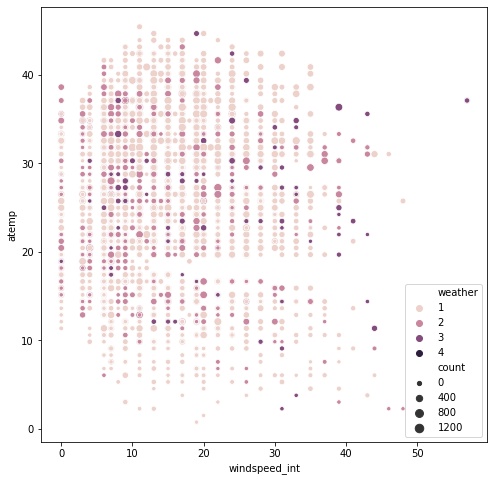

In [63]:
# windspeed_int / count 
plt.figure(figsize=(8,8))
sns.scatterplot(data=train, x="windspeed_int", y="atemp", size="count", hue="weather")

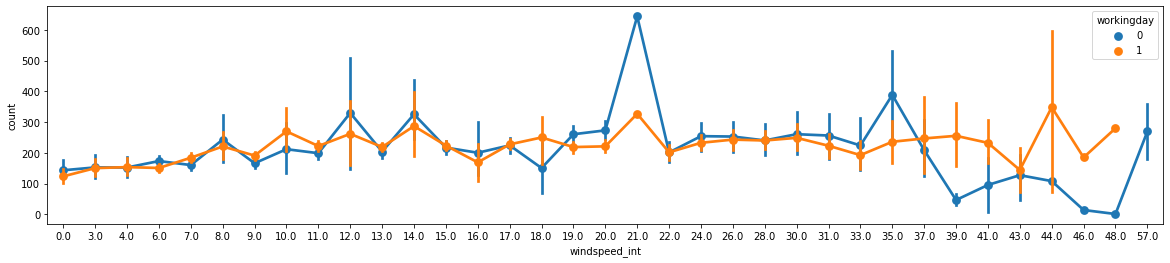

In [64]:
plt.figure(figsize=(20,4))
sns.pointplot(data=train, x="windspeed_int", y="count", hue="workingday")

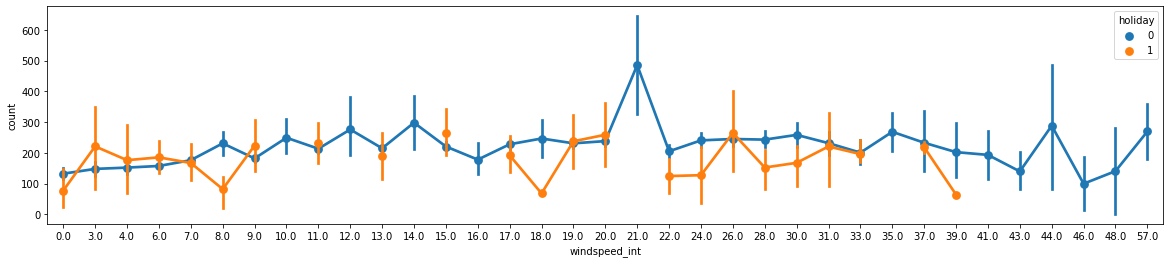

In [65]:
plt.figure(figsize=(20,4))
sns.pointplot(data=train, x="windspeed_int", y="count", hue="holiday")

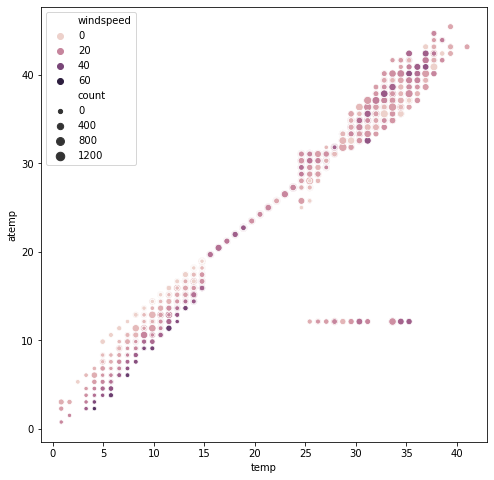

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train, x="temp", y="atemp", size="count", hue="windspeed")

온도와 체감온도는 거의 비슷. windspeed가 높은 날은 체감온도가 더 낮음.
atemp만 feature 추가

In [71]:
train[(train["atemp"] < 15) & (train["temp"] > 25)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_dayofweek,weather_mod,windspeed_int,windspeed_prev,windspeed_next
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,...,88,2012,8,17,0,4,1,11.0,7.0,7.0
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,...,54,2012,8,17,1,4,1,7.0,11.0,9.0
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,...,19,2012,8,17,2,4,1,9.0,7.0,7.0
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,...,6,2012,8,17,3,4,1,7.0,9.0,11.0
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,...,9,2012,8,17,4,4,1,11.0,7.0,7.0
8996,2012-08-17 05:00:00,3,0,1,1,26.24,12.12,73,7.0015,2,...,36,2012,8,17,5,4,1,7.0,11.0,9.0
8997,2012-08-17 06:00:00,3,0,1,1,25.42,12.12,78,8.9981,6,...,157,2012,8,17,6,4,1,9.0,7.0,7.0
8998,2012-08-17 07:00:00,3,0,1,1,26.24,12.12,73,7.0015,11,...,379,2012,8,17,7,4,1,7.0,9.0,9.0
8999,2012-08-17 08:00:00,3,0,1,1,27.88,12.12,65,8.9981,43,...,668,2012,8,17,8,4,1,9.0,7.0,7.0
9000,2012-08-17 09:00:00,3,0,1,1,28.70,12.12,58,7.0015,58,...,378,2012,8,17,9,4,1,7.0,9.0,11.0


2012-08-17의 atemp 데이터가 전부 12.12 로 기록되어 있음. => 잘못된 기록일 확률이 높음

In [67]:
train["diff_temp_atemp"] = train["temp"] - train["atemp"]
train[["datetime","temp", "atemp", "diff_temp_atemp"]].head()

,datetime,temp,atemp,diff_temp_atemp
877,2011-03-01 00:00:00,12.30,13.635,-1.335
878,2011-03-01 01:00:00,10.66,11.365,-0.705
879,2011-03-01 02:00:00,9.84,10.605,-0.765
880,2011-03-01 03:00:00,9.02,10.605,-1.585
881,2011-03-01 04:00:00,9.02,10.605,-1.585


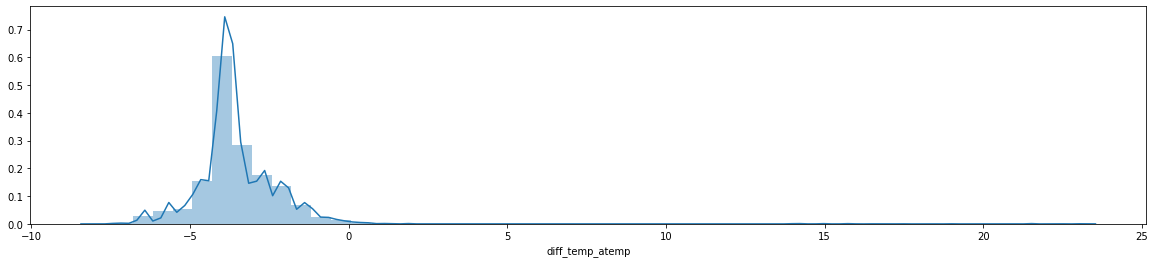

In [68]:
plt.figure(figsize=(20,4))
sns.distplot(train["diff_temp_atemp"])

In [69]:
train.loc[(train["temp"]>20) & (train["temp"]<28),"temp" ].value_counts()

26.24    452
25.42    402
22.14    400
22.96    392
27.06    390
24.60    385
21.32    358
20.50    325
27.88    224
23.78    200
Name: temp, dtype: int64

In [70]:
train.loc[(train["atemp"]>20) & (train["atemp"]<28),"atemp" ].value_counts()

25.760    420
26.515    392
22.725    389
20.455    377
25.000    361
21.210    341
24.240    325
21.970    311
27.275    279
23.485    166
Name: atemp, dtype: int64

In [71]:
# temp/atemp 정수화
train["temp_int"] = train["temp"].round(0)
train["atemp_int"] = train["atemp"].round(0)
train[["temp","temp_int","atemp","atemp_int"]]

,temp,temp_int,atemp,atemp_int
877,12.30,12.0,13.635,14.0
878,10.66,11.0,11.365,11.0
879,9.84,10.0,10.605,11.0
880,9.02,9.0,10.605,11.0
881,9.02,9.0,10.605,11.0
...,...,...,...,...
10881,15.58,16.0,19.695,20.0
10882,14.76,15.0,17.425,17.0
10883,13.94,14.0,15.910,16.0
10884,13.94,14.0,17.425,17.0


In [72]:
# test temp/atemp 정수화
test["temp_int"] = test["temp"].round(0)
test["atemp_int"] = test["atemp"].round(0)
test[["temp","temp_int","atemp","atemp_int"]]

,temp,temp_int,atemp,atemp_int
0,10.66,11.0,11.365,11.0
1,10.66,11.0,13.635,14.0
2,10.66,11.0,13.635,14.0
3,10.66,11.0,12.880,13.0
4,10.66,11.0,12.880,13.0
...,...,...,...,...
6488,10.66,11.0,12.880,13.0
6489,10.66,11.0,12.880,13.0
6490,10.66,11.0,12.880,13.0
6491,10.66,11.0,13.635,14.0


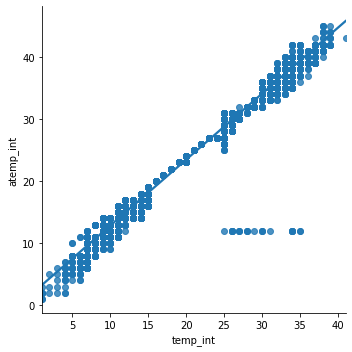

In [73]:
sns.lmplot(data=train, x="temp_int", y="atemp_int")

In [74]:
train["diff_temp_atemp"] = train["temp_int"] - train["atemp_int"]
train[train["diff_temp_atemp"] > 10]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_day,datetime_hour,datetime_dayofweek,weather_mod,windspeed_int,windspeed_prev,windspeed_next,diff_temp_atemp,temp_int,atemp_int
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,...,17,0,4,1,11.0,7.0,7.0,16.0,28.0,12.0
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,...,17,1,4,1,7.0,11.0,9.0,15.0,27.0,12.0
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,...,17,2,4,1,9.0,7.0,7.0,15.0,27.0,12.0
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,...,17,3,4,1,7.0,9.0,11.0,14.0,26.0,12.0
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,...,17,4,4,1,11.0,7.0,7.0,14.0,26.0,12.0
8996,2012-08-17 05:00:00,3,0,1,1,26.24,12.12,73,7.0015,2,...,17,5,4,1,7.0,11.0,9.0,14.0,26.0,12.0
8997,2012-08-17 06:00:00,3,0,1,1,25.42,12.12,78,8.9981,6,...,17,6,4,1,9.0,7.0,7.0,13.0,25.0,12.0
8998,2012-08-17 07:00:00,3,0,1,1,26.24,12.12,73,7.0015,11,...,17,7,4,1,7.0,9.0,9.0,14.0,26.0,12.0
8999,2012-08-17 08:00:00,3,0,1,1,27.88,12.12,65,8.9981,43,...,17,8,4,1,9.0,7.0,7.0,16.0,28.0,12.0
9000,2012-08-17 09:00:00,3,0,1,1,28.70,12.12,58,7.0015,58,...,17,9,4,1,7.0,9.0,11.0,17.0,29.0,12.0


In [75]:
train.loc[train["diff_temp_atemp"] > 10, "atemp_int"] = train["temp_int"]
train[train["diff_temp_atemp"] > 10].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_day,datetime_hour,datetime_dayofweek,weather_mod,windspeed_int,windspeed_prev,windspeed_next,diff_temp_atemp,temp_int,atemp_int
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,...,17,0,4,1,11.0,7.0,7.0,16.0,28.0,28.0
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,...,17,1,4,1,7.0,11.0,9.0,15.0,27.0,27.0
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,...,17,2,4,1,9.0,7.0,7.0,15.0,27.0,27.0
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,...,17,3,4,1,7.0,9.0,11.0,14.0,26.0,26.0
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,...,17,4,4,1,11.0,7.0,7.0,14.0,26.0,26.0


In [76]:
test["diff_temp_atemp"] = test["temp_int"] - test["atemp_int"]
test[test["diff_temp_atemp"] < -10]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,...,datetime_day,datetime_hour,datetime_dayofweek,weather_mod,windspeed_int,windspeed_prev,windspeed_next,temp_int,atemp_int,diff_temp_atemp
1603,2011-07-21 19:00:00,3,0,1,1,35.26,46.210,67,19.0012,2011,...,21,19,3,1,19.0,19.0,15.0,35.0,46.0,-11.0
1604,2011-07-21 20:00:00,3,0,1,1,34.44,44.695,71,15.0013,2011,...,21,20,3,1,15.0,19.0,15.0,34.0,45.0,-11.0
1605,2011-07-21 21:00:00,3,0,1,1,33.62,44.695,75,15.0013,2011,...,21,21,3,1,15.0,15.0,11.0,34.0,45.0,-11.0
1622,2011-07-22 14:00:00,3,0,1,1,39.36,50.000,48,19.9995,2011,...,22,14,4,1,20.0,11.0,20.0,39.0,50.0,-11.0


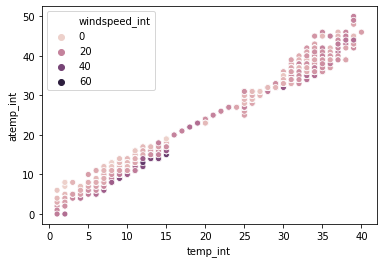

In [77]:
sns.scatterplot(data=test, x="temp_int", y="atemp_int", hue="windspeed_int")

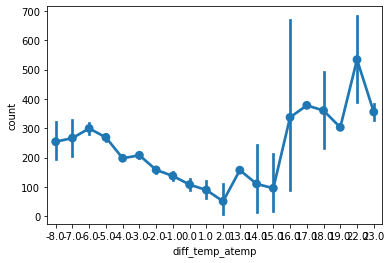

In [78]:
sns.pointplot(data=train, x="diff_temp_atemp", y="count")

In [79]:
# 모수가 너무 적은 구간 통일
train.loc[train["diff_temp_atemp"] < -6, "diff_temp_atemp"] = -6
train.loc[train["diff_temp_atemp"] >  0, "diff_temp_atemp"] = 0

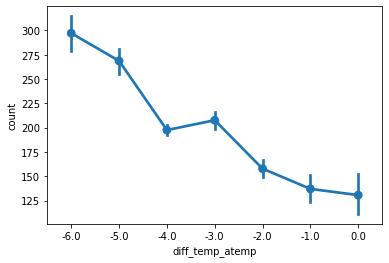

In [80]:
sns.pointplot(data=train, x="diff_temp_atemp", y="count")

In [81]:
# test 데이터 동일 처리
test.loc[test["diff_temp_atemp"] < -6, "diff_temp_atemp"] = -6
test.loc[test["diff_temp_atemp"] >  0, "diff_temp_atemp"] = 0

가설 8 습도는 여름의 경우 크게 작용할 수 있을 것 같아보임.

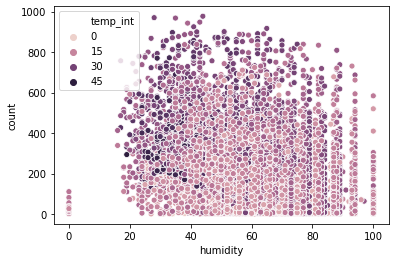

In [82]:
sns.scatterplot(data=train, x="humidity", y="count", hue="temp_int")

습도는 겨울이 더 높은 편이다.

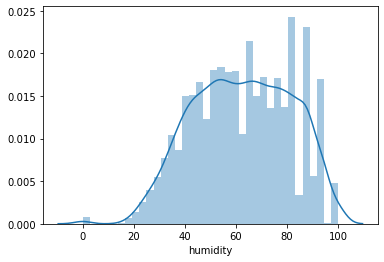

In [83]:
sns.distplot(train["humidity"])

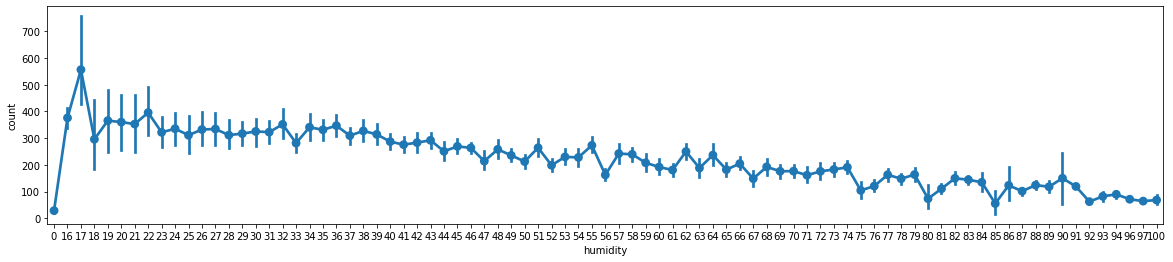

In [84]:
plt.figure(figsize=(20,4))
sns.pointplot(data=train, x="humidity", y="count")

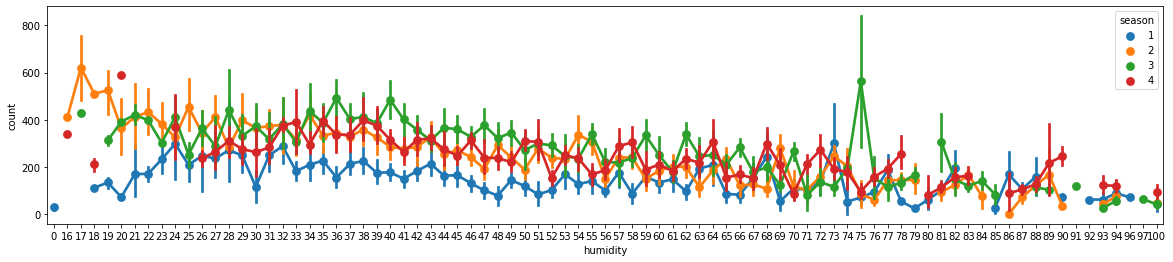

In [85]:
plt.figure(figsize=(20,4))
sns.pointplot(data=train, x="humidity", y="count", hue="season")

습도가 높을 수록 대여량이 감소하는 추세를 보인다. 

년-월 비교

In [86]:
train["datetime_year-month"] = train["datetime_year"].astype("str") + "-" + train["datetime_month"].astype("str")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_hour,datetime_dayofweek,weather_mod,windspeed_int,windspeed_prev,windspeed_next,diff_temp_atemp,temp_int,atemp_int,datetime_year-month
877,2011-03-01 00:00:00,1,0,1,1,12.30,13.635,70,31.0009,0,...,0,1,1,31.0,NaN,24.0,-2.0,12.0,14.0,2011-3
878,2011-03-01 01:00:00,1,0,1,1,10.66,11.365,70,23.9994,0,...,1,1,1,24.0,31.0,26.0,0.0,11.0,11.0,2011-3
879,2011-03-01 02:00:00,1,0,1,1,9.84,10.605,65,26.0027,0,...,2,1,1,26.0,24.0,19.0,-1.0,10.0,11.0,2011-3
880,2011-03-01 03:00:00,1,0,1,1,9.02,10.605,69,19.0012,0,...,3,1,1,19.0,26.0,17.0,-2.0,9.0,11.0,2011-3
881,2011-03-01 04:00:00,1,0,1,1,9.02,10.605,69,16.9979,0,...,4,1,1,17.0,19.0,19.0,-2.0,9.0,11.0,2011-3


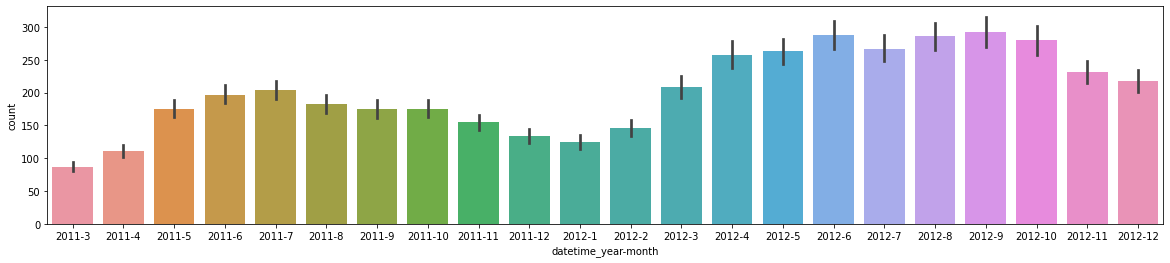

In [87]:
plt.figure(figsize=(20,4))
sns.barplot(data=train, x="datetime_year-month", y="count")

In [88]:
train["datetime_year-month(int)"] = (train["datetime_year"].astype("str") + "00").astype("int") + train["datetime_month"].astype("int")
train["datetime_year-month(int)"].unique()

array([201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110,
       201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206,
       201207, 201208, 201209, 201210, 201211, 201212], dtype=int32)

In [89]:
test["datetime_year-month(int)"] = (test["datetime_year"].astype("str") + "00").astype("int") + test["datetime_month"].astype("int")
test["datetime_year-month(int)"].unique()

array([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108,
       201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204,
       201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212])

datetime_month 를 사용할 경우 1월이 12월보다 적게 예측하게 된다. 년-월을 붙여서 사용하는 것이 더 정확하게 예측할 수 있다.

In [90]:
# One Hot encoding - dayofweek, season, weather
train["dayofweek_0"] = (train["datetime_dayofweek"] == 0)
train["dayofweek_1"] = (train["datetime_dayofweek"] == 1)
train["dayofweek_2"] = (train["datetime_dayofweek"] == 2)
train["dayofweek_3"] = (train["datetime_dayofweek"] == 3)
train["dayofweek_4"] = (train["datetime_dayofweek"] == 4)
train["dayofweek_5"] = (train["datetime_dayofweek"] == 5)
train["dayofweek_6"] = (train["datetime_dayofweek"] == 6)

train[["datetime_dayofweek", "dayofweek_0", "dayofweek_1", "dayofweek_2", "dayofweek_3", "dayofweek_4", "dayofweek_5", "dayofweek_6"]].head()

,datetime_dayofweek,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
877,1,False,True,False,False,False,False,False
878,1,False,True,False,False,False,False,False
879,1,False,True,False,False,False,False,False
880,1,False,True,False,False,False,False,False
881,1,False,True,False,False,False,False,False


In [91]:
train["season_1"] = (train["season"] == 1)
train["season_2"] = (train["season"] == 2)
train["season_3"] = (train["season"] == 3)
train["season_4"] = (train["season"] == 4)

train[["season", "season_1", "season_2", "season_3", "season_4"]].head()

,season,season_1,season_2,season_3,season_4
877,1,True,False,False,False
878,1,True,False,False,False
879,1,True,False,False,False
880,1,True,False,False,False
881,1,True,False,False,False


In [92]:
train["weather_1"] = (train["weather"] == 1)
train["weather_2"] = (train["weather"] == 2)
train["weather_3"] = (train["weather"] == 3)
train["weather_4"] = (train["weather"] == 4)
train[["weather", "weather_1", "weather_2", "weather_3", "weather_4"]].head()

,weather,weather_1,weather_2,weather_3,weather_4
877,1,True,False,False,False
878,1,True,False,False,False
879,1,True,False,False,False
880,1,True,False,False,False
881,1,True,False,False,False


In [93]:
# test one hot encoding

test["dayofweek_0"] = (test["datetime_dayofweek"] == 0)
test["dayofweek_1"] = (test["datetime_dayofweek"] == 1)
test["dayofweek_2"] = (test["datetime_dayofweek"] == 2)
test["dayofweek_3"] = (test["datetime_dayofweek"] == 3)
test["dayofweek_4"] = (test["datetime_dayofweek"] == 4)
test["dayofweek_5"] = (test["datetime_dayofweek"] == 5)
test["dayofweek_6"] = (test["datetime_dayofweek"] == 6)

test["season_1"] = (test["season"] == 1)
test["season_2"] = (test["season"] == 2)
test["season_3"] = (test["season"] == 3)
test["season_4"] = (test["season"] == 4)

test["weather_1"] = (test["weather_mod"] == 1)
test["weather_2"] = (test["weather_mod"] == 2)
test["weather_3"] = (test["weather_mod"] == 3)
test["weather_4"] = (test["weather_mod"] == 4)

### Train

In [94]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
       'datetime_dayofweek', 'weather_mod', 'windspeed_int', 'windspeed_prev',
       'windspeed_next', 'diff_temp_atemp', 'temp_int', 'atemp_int',
       'datetime_year-month', 'datetime_year-month(int)', 'dayofweek_0',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [95]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime_year', 'datetime_month',
       'datetime_day', 'datetime_hour', 'datetime_dayofweek', 'weather_mod',
       'windspeed_int', 'windspeed_prev', 'windspeed_next', 'temp_int',
       'atemp_int', 'diff_temp_atemp', 'datetime_year-month(int)',
       'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3',
       'dayofweek_4', 'dayofweek_5', 'dayofweek_6', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')

In [96]:
# RandomForestRegressor를 생성
# 1) n_estimators. 트리의 개수입니다. 10을 넣으면 10개의 트리를 생성합니다.
# 2) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 3) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model_r = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,
                              random_state=3)
model_c = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,
                              random_state=3)
model_cnt = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,
                              random_state=3)
#model

In [124]:
feature_names = ['holiday', 'workingday', 
       'temp', 'windspeed', 'season', 'datetime_year', 
       'weather', 'humidity',        
       'datetime_hour',
       'datetime_year-month(int)',         
       'datetime_dayofweek','diff_temp_atemp'
                ]
label_name = ["registered", "casual", "count"]

# train
X_train = train[feature_names]
y_train_r = train[label_name[0]]
y_train_c = train[label_name[1]]
y_train_cnt = train[label_name[2]]
print(X_train.shape)
print(y_train_r.shape)
print(y_train_c.shape)
print(y_train_cnt.shape)

(10009, 12)
(10009,)
(10009,)
(10009,)


In [125]:
# test
X_test = test[feature_names]
print(X_test.shape)

(6493, 12)


## Evaluate

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$


In [126]:
import numpy as np
y_train_log_r = np.log(y_train_r+1)
y_train_log_c = np.log(y_train_c+1)
y_train_log_cnt = np.log(y_train_cnt+1)

In [105]:
from sklearn.model_selection import cross_val_predict
y_predict_log_r = cross_val_predict(model_r, X_train, y_train_log_r, cv=20)
y_predict_log_c = cross_val_predict(model_c, X_train, y_train_log_c, cv=20)
y_predict_log_cnt = cross_val_predict(model_cnt, X_train, y_train_log_cnt, cv=20)

In [ ]:
print(f"y_predict_log_r : {y_predict_log_r}")
print(f"y_predict_log_c : {y_predict_log_c}")
print(f"y_predict_log_cnt : {y_predict_log_cnt}")

In [100]:
# log 수식 적용을 한 값이기 때문에 exp - 1 
y_predict_r = np.exp(y_predict_log_r) - 1
y_predict_c = np.exp(y_predict_log_c) - 1
y_predict_cnt = np.exp(y_predict_log_cnt) - 1

print(f"y_predict_r : {y_predict_r}")
print(f"y_predict_c : {y_predict_c}")
print(f"y_predict_cnt : {y_predict_cnt}")

NameError: name 'np' is not defined

In [101]:
# registerd + casual 과 cnt 결과값의 기하평균
y_predict = np.sqrt((y_predict_r + y_predict_c) * y_predict_cnt)

score = mean_squared_log_error(y_train_cnt, y_predict)
score = np.sqrt(score)
print(f"score : {score : .5f}")

NameError: name 'np' is not defined

## Hyperparameter Tuning

### Random Search(Coarse)
1차적으로 random하게 패러미터 조정하여 하위 조합을 제거

In [119]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

# randomforest 사용될 tree 개수 (높을수록 좋음. 테스트용 300)
n_estimators = 300

# 랜덤 서치 반복 횟수 (보통 100)
num_epoch = 100

# 탐색 결과 리스트
coarse_hyperparameters_list = []

for epoch in range(num_epoch) :
    # random
    max_depth = np.random.randint(2,100)
    max_features = np.random.uniform(0.1,1.0)
    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                    max_depth = max_depth,
                                    max_features = max_features,
                                    n_jobs = -1,
                                    random_state=3)
    
    y_predict_log_r = cross_val_predict(model, X_train, y_train_log_r, cv=20)
    y_predict_log_c = cross_val_predict(model, X_train, y_train_log_c, cv=20)
    y_predict_log_cnt = cross_val_predict(model, X_train, y_train_log_cnt, cv=20)
    
    # log 수식 적용을 한 값이기 때문에 exp - 1 
    y_predict_r = np.exp(y_predict_log_r) - 1
    y_predict_c = np.exp(y_predict_log_c) - 1
    y_predict_cnt = np.exp(y_predict_log_cnt) - 1
    
    y_predict = np.sqrt((y_predict_r + y_predict_c) * y_predict_cnt)
    
    # Mean Squared Logarithmic Error(MSLE)
    score = mean_squared_log_error(y_train_cnt, y_predict)
    # Root Mean Squared Logarithmic Error(LMSLE) : bike sharing demand 의 점수 산정 방식
    score = np.sqrt(score)
    
    # 출력을 위한 작업
    # hyperparameter 탐색 결과를 딕셔너리화
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }
    
     # hyperparameter 탐색 결과를 리스트에 저장 (점수순 정렬을 위한 작업)
    coarse_hyperparameters_list.append(hyperparameters)
    #print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")
    
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
# score 기준 낮음 -> 높음 순서
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")

print(coarse_hyperparameters_list.shape)
# coarse_hyperparameters_list의 상위 10개를 출력. 점수가 낮을수록 성능이 높음
coarse_hyperparameters_list.head(10)

(100, 5)


,epoch,score,n_estimators,max_depth,max_features
12,12,0.341239,300,81,0.652877
4,4,0.341239,300,92,0.676615
24,24,0.341239,300,66,0.645040
9,9,0.341239,300,71,0.671988
15,15,0.341613,300,16,0.624285
29,29,0.341842,300,55,0.734601
88,88,0.341842,300,75,0.767234
26,26,0.341842,300,39,0.796240
19,19,0.341842,300,96,0.782383
46,46,0.341842,300,83,0.757014


### Random Search(Fine)
Coarse에서 찾아낸 상위 값들을 패러미터 범위로 지정하여 다시 Search 

In [107]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

# randomforest 사용될 tree 개수 (300)
n_estimators = 300

# 랜덤 서치 반복 횟수 (100)
num_epoch = 100

#Coarse result
#corse_result = coarse_hyperparameters_list.iloc[:10]

# 탐색 결과 리스트
fine_hyperparameters_list = []

for epoch in range(num_epoch) :
    # random (Coarse에서 찾아낸 값을 기준으로 재설정)
    #max_depth = np.random.randint(corse_result["max_depth"].min(),corse_result["max_depth"].max())
    #max_features = np.random.uniform(corse_result["max_features"].min(),corse_result["max_features"].max())
    
    #수기값 적용
    max_depth = np.random.randint(16, 96)
    max_features = np.random.uniform(0.624285, 0.796240)
    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                    max_depth = max_depth,
                                    max_features = max_features,
                                    n_jobs = -1,
                                    random_state=3)
    
    y_predict_log_r = cross_val_predict(model, X_train, y_train_log_r, cv=20)
    y_predict_log_c = cross_val_predict(model, X_train, y_train_log_c, cv=20)
    y_predict_log_cnt = cross_val_predict(model, X_train, y_train_log_cnt, cv=20)
    
    # log 수식 적용을 한 값이기 때문에 exp - 1 
    y_predict_r = np.exp(y_predict_log_r) - 1
    y_predict_c = np.exp(y_predict_log_c) - 1
    y_predict_cnt = np.exp(y_predict_log_cnt) - 1
    
    y_predict = np.sqrt((y_predict_r + y_predict_c) * y_predict_cnt)
    
    # Mean Squared Logarithmic Error(MSLE)
    score = mean_squared_log_error(y_train_cnt, y_predict)
    # Root Mean Squared Logarithmic Error(LMSLE) : bike sharing demand 의 점수 산정 방식
    score = np.sqrt(score)
    
    # 출력을 위한 작업
    # hyperparameter 탐색 결과를 딕셔너리화
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }
    
     # hyperparameter 탐색 결과를 리스트에 저장 (점수순 정렬을 위한 작업)
    fine_hyperparameters_list.append(hyperparameters)
    #print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")
    
fine_hyperparameters_list = pd.DataFrame.from_dict(fine_hyperparameters_list)
# score 기준 낮음 -> 높음 순서
fine_hyperparameters_list = fine_hyperparameters_list.sort_values(by = "score")

print(fine_hyperparameters_list.shape)
# coarse_hyperparameters_list의 상위 10개를 출력. 점수가 낮을수록 성능이 높음
fine_hyperparameters_list.head(10)

(100, 5)


,epoch,score,n_estimators,max_depth,max_features
82,82,0.340915,300,16,0.702222
8,8,0.341308,300,16,0.674585
99,99,0.341349,300,68,0.761390
29,29,0.341349,300,44,0.778648
65,65,0.341349,300,43,0.732933
81,81,0.341349,300,71,0.775612
34,34,0.341349,300,65,0.762759
80,80,0.341349,300,86,0.715056
79,79,0.341349,300,43,0.744204
38,38,0.341349,300,72,0.769416


In [108]:
# Best hyper parameter
best_hyperparameter = fine_hyperparameters_list.iloc[0]
best_max_depth = best_hyperparameter["max_depth"]
best_max_features = best_hyperparameter["max_features"]
print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

max_depth(best) = 16.0, max_features(best) = 0.702222


### Predict

In [127]:
from sklearn.ensemble import RandomForestRegressor

# 3000
best_n_estimators = 3000

# 주의: 혹시 하이퍼패러미터 튜닝을 하는데 시간이 너무 오래 걸린다면,
# 이를 대신해서 다음의 하이퍼패러미터를 사용해주세요. (아래 두 줄의 주석을 풀면 됩니다)
best_max_depth = 97
best_max_features = 0.897703
        
# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators = best_n_estimators,
                              max_depth = best_max_depth,
                              max_features = best_max_features,
                              #random_state = 3,
                              random_state = 37,
                              n_jobs = -1)
model

RandomForestRegressor(max_depth=97, max_features=0.897703, n_estimators=3000,
                      n_jobs=-1, random_state=37)

### Fit

In [128]:
# registered
model.fit(X_train, y_train_log_r)
log_r_prediction = model.predict(X_test)

In [129]:
# registered
model.fit(X_train, y_train_log_c)
log_c_prediction = model.predict(X_test)

In [130]:
# count
model.fit(X_train, y_train_log_cnt)
log_cnt_prediction = model.predict(X_test)

In [131]:
r_predciton = np.exp(log_r_prediction) - 1 
c_predciton = np.exp(log_c_prediction) - 1 
cnt_predciton = np.exp(log_cnt_prediction) - 1 
prediction = np.sqrt((r_predciton + c_predciton) * cnt_predciton)

In [132]:
print(prediction.shape)
prediction

(6493,)


array([ 11.59901979,   4.07347905,   3.05265222, ..., 163.60834555,
       110.30393704,  66.16182   ])

In [133]:
# log 함수 특성상 정확도가 크게 작용하기 때문에 실수형보다는 정수형이 점수가 더 좋지 않을까 예상. 
predciton_round = prediction.round(0)

In [134]:
submit = pd.read_csv("data/sampleSubmission.csv")
submit.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [135]:
submit["count"] = prediction
submit.head(20)

,datetime,count
0,2011-01-20 00:00:00,11.599020
1,2011-01-20 01:00:00,4.073479
2,2011-01-20 02:00:00,3.052652
3,2011-01-20 03:00:00,2.795927
4,2011-01-20 04:00:00,2.209010
5,2011-01-20 05:00:00,5.877299
6,2011-01-20 06:00:00,41.087359
7,2011-01-20 07:00:00,110.810842
8,2011-01-20 08:00:00,232.685977
9,2011-01-20 09:00:00,141.839798


In [136]:
submit.to_csv("submit/hyper.csv", index=False)

In [137]:
submit["count"] = predciton_round
submit.to_csv("submit/hyper_round.csv", index=False)